# IBM Employee Churn Prediction
December 2022
The task at hand is to help IBM retain their valuable employees. I will do this by predicting attrition of those employees and exploring what the key drivers of employee churn are.

Four datasets need to be merged so I can find out what department each employee works in, what their job title is, whats causing employee attrition and finally to gather all the features for prediction.

To predict attrition of IBM's valuable employees, I will build and compare three different classification models. 

--------------------------------------------------------------------------

<h3 align="center">Reading in Data</h3> 

In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import naive_bayes
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

In [2]:
# dataset urls
employees_url = 'https://raw.githubusercontent.com/advaithreddy/churn_rate/main/data/employees.csv'
departments_url = 'https://raw.githubusercontent.com/advaithreddy/churn_rate/main/data/departments.csv'
dept_emp_url = 'https://raw.githubusercontent.com/advaithreddy/churn_rate/main/data/dept_emp.csv'
job_role_url = 'https://raw.githubusercontent.com/advaithreddy/churn_rate/main/data/titles.csv'

In [4]:
#reading into dataframe
employees = pd.read_csv(employees_url)
departments = pd.read_csv(departments_url)
dept_emp = pd.read_csv(dept_emp_url)
job_roles = pd.read_csv(job_role_url)

__employees__ gives us information about the employees such as age, gender, income, education. martial status, satisfaction, attrition and more.

In [5]:
employees.head()

,EmployeeNumber,Age,Gender,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,10001,41,Female,Yes,Travel_Rarely,1102,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,10002,49,Male,No,Travel_Frequently,279,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,10003,37,Male,Yes,Travel_Rarely,1373,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,10004,33,Female,No,Travel_Frequently,1392,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,10005,27,Male,No,Travel_Rarely,591,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


__departments__ gives the departments within the company and their codes/numbers

In [6]:
departments

,dept_no,dept_name
0,d001,Human Resources
1,d002,Research & Development
2,d003,Sales


__job_roles__ gives the job roles of each employee within the company

In [7]:
job_roles.head()

,emp_no,titles
0,10001,Sales Executive
1,10002,Research Scientist
2,10003,Laboratory Technician
3,10004,Research Scientist
4,10005,Laboratory Technician


__dept_emp__ tells us the number/code of the department that each employee works in.

In [8]:
dept_emp.head()

,emp_no,dept_no
0,10001,d003
1,10002,d002
2,10003,d002
3,10004,d002
4,10005,d002


<h3 align="center">Data Wrangling</h3> 

Here I will be cleaning and preprocessing the datasets. I will be checking for any nulls.

In [9]:
employees.isnull().sum()

EmployeeNumber              0
Age                         0
Gender                      0
Attrition                   0
BusinessTravel              0
DailyRate                   0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [10]:
departments.isnull().sum()

dept_no      0
dept_name    0
dtype: int64

In [11]:
dept_emp.isnull().sum()

emp_no     0
dept_no    0
dtype: int64

In [12]:
job_roles.isnull().sum()

emp_no    0
titles    0
dtype: int64

<h3 align="center">Exploratory Data Analysis (EDA)</h3> 

In the exploratory data analysis (EDA) portion of this project, I will be looking at some descriptive statistics and answering the following questions:

1. How many employees have stayed? How many have left?
1. What departments do employees work in?
1. How many distinct job roles are there?
1. What seems to be the key drivers of employee churn?

### Descriptive Stats

Going to look at the shape of each dataset and make sure the types make sense. There are 1470 employees so this should reflect as well.

In [13]:
employees.shape

(1470, 34)

In [14]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   Attrition                 1470 non-null   object
 4   BusinessTravel            1470 non-null   object
 5   DailyRate                 1470 non-null   int64 
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [15]:
departments.shape

(3, 2)

In [16]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_no    3 non-null      object
 1   dept_name  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [17]:
dept_emp.shape

(1470, 2)

In [18]:
dept_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emp_no   1470 non-null   int64 
 1   dept_no  1470 non-null   object
dtypes: int64(1), object(1)
memory usage: 23.1+ KB


In [19]:
job_roles.shape

(1470, 2)

In [20]:
job_roles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   emp_no  1470 non-null   int64 
 1   titles  1470 non-null   object
dtypes: int64(1), object(1)
memory usage: 23.1+ KB


The types are correct and make sense. The shapes also make sense.

### How many employees have stayed? How many have left?

In [21]:
employees['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x223c1946d30>,
 [Text(-1.0493363707830166, 0.5821453263163142, 'No'),
  Text(1.0493363707830163, -0.5821453263163142, 'Yes')],
 [Text(-0.6121128829567596, 0.33958477368451656, '83.9%'),
  Text(0.6121128829567595, -0.3395847736845166, '16.1%')])

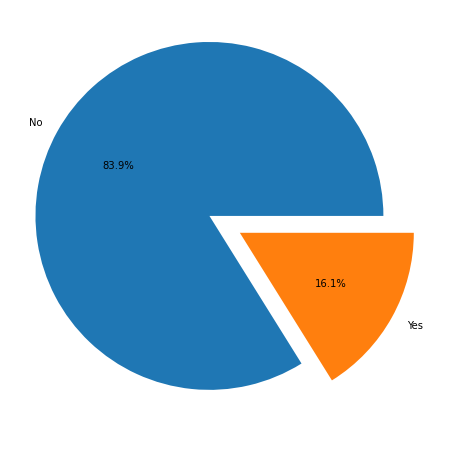

In [22]:
plt.figure(figsize=(8,8))
pie = employees.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%')

83.9% (1233) of IBM's employees have stayed, while 16.1% (237) have left.

### What departments do employees work in?

To do this, we're going to have to join the __departments__ and __dept_emp__ tables. I'm going to use an __inner join__ because I want to combine records from the two tables whenever there are matching values in a dept_no column.

In [23]:
departments.columns

Index(['dept_no', 'dept_name'], dtype='object')

In [24]:
dept_emp.columns

Index(['emp_no', 'dept_no'], dtype='object')

In [25]:
new_departments = pd.merge(departments, dept_emp, how="inner", on=["dept_no"])

In [26]:
new_departments

,dept_no,dept_name,emp_no
0,d001,Human Resources,10080
1,d001,Human Resources,10101
2,d001,Human Resources,10106
3,d001,Human Resources,10113
4,d001,Human Resources,10135
...,...,...,...
1465,d003,Sales,11455
1466,d003,Sales,11462
1467,d003,Sales,11463
1468,d003,Sales,11465


Now we can see each department name and number assigned to the IBM employees.

__How many distinct departments are there in the company?__ I'm going to use a for loop to count the number of unique departments among the employees at IMB. I'm going to count the number of unique values in the column __'dept_name'__.

The for loop iterates throuhg the __dept_name__ column and for each name, checks whether it has already been visited in the dept list. The count is incremented by one, if the name has not yet been visited.

In [27]:
# variable storing the count
count = 0
  
# list to hold visited values
dept = []
  
# loop for counting the unique
# values in height
for i in range(0, len(new_departments['dept_name'])):
    
    if new_departments['dept_name'][i] not in dept: 
        
        dept.append(new_departments['dept_name'][i])
          
        count += 1
        
        print(f'count: {count}') #will give all iterations in order
  
print("No.of.unique values :", count)
  
print("unique values :", dept)

count: 1
count: 2
count: 3
No.of.unique values : 3
unique values : ['Human Resources', 'Research & Development', 'Sales']


The print() function creates a side effect. The side effect tells us there are 3 unique departments at IBM among these 1470 employees.

### How many distinct job roles are there?

I'm going to use the __unique() function__ to determine the unique roles at IBM. 

In [28]:
job_roles.titles.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [29]:
job_roles['titles'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: titles, dtype: int64

There are __9 distinct roles__ at IBM. The role that has the most employees is 'Sales Executive', while the one thta has the leats is 'Human Resources'.

### What seems to be the key drivers of employee churn?

To analyze this, we need one dataset that has all the features we need. First, I'm going to join our __new_departments__ table containing the department number, department name and employee number to the __job_roles__ table. I'm going to use a __full outer join__ because I want all rows from both dataframes to be present

I'll call it __job_info__ since it contains information about each employees job.

In [30]:
job_info = pd.merge(new_departments,job_roles,on='emp_no',how='outer')
job_info

,dept_no,dept_name,emp_no,titles
0,d001,Human Resources,10080,Human Resources
1,d001,Human Resources,10101,Human Resources
2,d001,Human Resources,10106,Manager
3,d001,Human Resources,10113,Manager
4,d001,Human Resources,10135,Human Resources
...,...,...,...,...
1465,d003,Sales,11455,Sales Executive
1466,d003,Sales,11462,Sales Executive
1467,d003,Sales,11463,Sales Executive
1468,d003,Sales,11465,Sales Representative


In [31]:
employees.columns

Index(['EmployeeNumber', 'Age', 'Gender', 'Attrition', 'BusinessTravel',
       'DailyRate', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Now I will concat our new __job_info__ dataset to the __employees__ dataset so we can begin exploring out EDA question.

In [32]:
job_info = job_info.rename(columns={"emp_no":"EmployeeNumber",
                         "dept_name":"Department",
                         "dept_no":"DepartmentNumber",
                         "titles":"JobRole"
                        })

In [33]:
job_info

,DepartmentNumber,Department,EmployeeNumber,JobRole
0,d001,Human Resources,10080,Human Resources
1,d001,Human Resources,10101,Human Resources
2,d001,Human Resources,10106,Manager
3,d001,Human Resources,10113,Manager
4,d001,Human Resources,10135,Human Resources
...,...,...,...,...
1465,d003,Sales,11455,Sales Executive
1466,d003,Sales,11462,Sales Executive
1467,d003,Sales,11463,Sales Executive
1468,d003,Sales,11465,Sales Representative


Where concat cannot align you will get NaN values. My solution to that is reseting the indices of the two datasets that I am merging togetehr.

In [34]:
job_info.reset_index(drop=True, inplace=True)
employees.reset_index(drop=True, inplace=True)

In [35]:
new_employees = pd.concat([job_info.set_index('EmployeeNumber'),
                        employees.set_index('EmployeeNumber')],
                        axis=1)
new_employees

,DepartmentNumber,Department,JobRole,Age,Gender,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
10001,d003,Sales,Sales Executive,41,Female,Yes,Travel_Rarely,1102,1,2,...,1,80,0,8,0,1,6,4,0,5
10002,d002,Research & Development,Research Scientist,49,Male,No,Travel_Frequently,279,8,1,...,4,80,1,10,3,3,10,7,1,7
10003,d002,Research & Development,Laboratory Technician,37,Male,Yes,Travel_Rarely,1373,2,2,...,2,80,0,7,3,3,0,0,0,0
10004,d002,Research & Development,Research Scientist,33,Female,No,Travel_Frequently,1392,3,4,...,3,80,0,8,3,3,8,7,3,0
10005,d002,Research & Development,Laboratory Technician,27,Male,No,Travel_Rarely,591,2,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11466,d002,Research & Development,Laboratory Technician,36,Male,No,Travel_Frequently,884,23,2,...,3,80,1,17,3,3,5,2,0,3
11467,d002,Research & Development,Healthcare Representative,39,Male,No,Travel_Rarely,613,6,1,...,1,80,1,9,5,3,7,7,1,7
11468,d002,Research & Development,Manufacturing Director,27,Male,No,Travel_Rarely,155,4,3,...,2,80,1,6,0,3,6,2,0,3


We can see that are new dataframe has 1470 records. This is good since there are 1470 employees.

__Now what is causing employee attrition?__

We can get an idea of this by looking at the correlations between the features in this datatset.

In [37]:
corr = new_employees.corr()

In [38]:
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,NaN,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,-0.012454,NaN,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


The columns displaying NaN are irrelevant features for looking at correlations so let's drop them.

In [39]:
employees_df = new_employees.drop(['EmployeeCount','StandardHours'], axis=1)
employees_df.columns

Index(['DepartmentNumber', 'Department', 'JobRole', 'Age', 'Gender',
       'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Okay let's look at it again.

In [40]:
employees_df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


To better understand this, let's visualize it using a heatmap.

<AxesSubplot:>

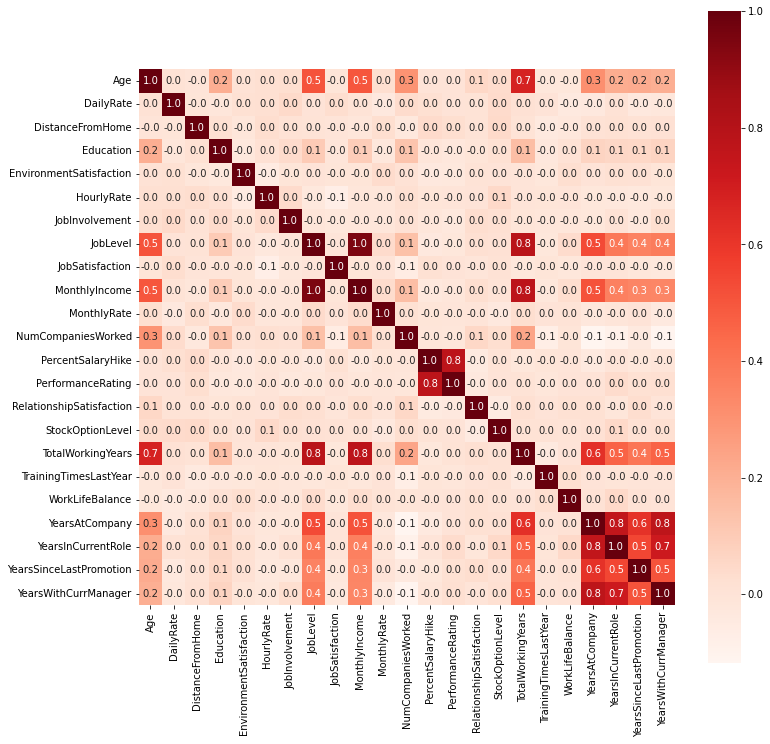

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(employees_df.corr(),cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

So this visualization addresses an issue. 'Attrition' is missing from our correlation map and that is what we want to be prediciting. Why is it missing? 

In [42]:
employees_df['Attrition'].dtypes

dtype('O')

It's an object when it should be an integer.

__Why?__ Because all machine learning models require numerical features. While we can analyze text data using feature extraction, it is not reasonable in this case because we are working with mostly structured data.

So I'm going to encode the __'Attrition'__ column so I can use it to look at the correlations, also preparing us for our prediction model.

In [43]:
employees_df['Attrition'] = employees_df['Attrition'].factorize(['No','Yes'])[0]

C:\Users\Advaith\AppData\Local\Temp/ipykernel_11980/1760469615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employees_df['Attrition'] = employees_df['Attrition'].factorize(['No','Yes'])[0]


In [44]:
employees_df.head()

,DepartmentNumber,Department,JobRole,Age,Gender,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
10001,d003,Sales,Sales Executive,41,Female,1,Travel_Rarely,1102,1,2,...,3,1,0,8,0,1,6,4,0,5
10002,d002,Research & Development,Research Scientist,49,Male,0,Travel_Frequently,279,8,1,...,4,4,1,10,3,3,10,7,1,7
10003,d002,Research & Development,Laboratory Technician,37,Male,1,Travel_Rarely,1373,2,2,...,3,2,0,7,3,3,0,0,0,0
10004,d002,Research & Development,Research Scientist,33,Female,0,Travel_Frequently,1392,3,4,...,3,3,0,8,3,3,8,7,3,0
10005,d002,Research & Development,Laboratory Technician,27,Male,0,Travel_Rarely,591,2,1,...,3,4,1,6,3,3,2,2,2,2


Now the 'Attrition' columns should be integers where:

'No' = 0

'Yes' = 1

We can look at the heatmap again.

<AxesSubplot:>

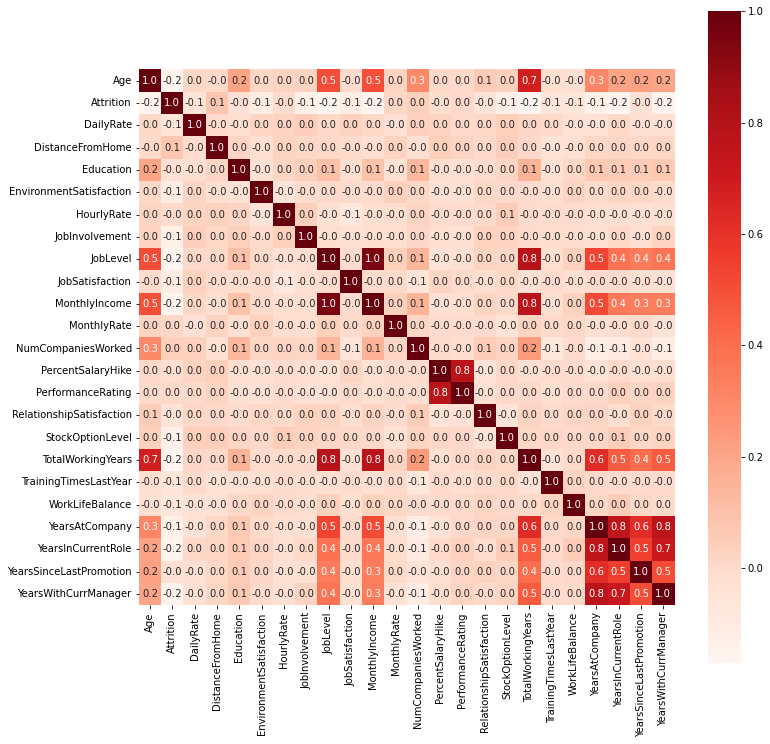

In [45]:
plt.figure(figsize=(12,12))
sns.heatmap(employees_df.corr(),cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

Much better!

While there isn't any significant correlations of the 'Attrition' column with any of the numerical columns, we can look to draw information from other correlations.

- Age and TotalWorkingYears are highly correlated. This would assume that older employees have worked longer.

- MonthlyIncome and TotalWorkingYears are highly correlated insinuating that an employee's monthly income increases as they work longer

- PerformanceRating and PercentSalaryHike are also highly correlated. Higher performance ratings leader to salary increases

- YearsInCurrentRole is highly correlated with YearsAtCompany and YearsWithCurrManager and moderatly correlated with YearsSinceLastPromotion. This insinuates that many employees remain in their current role under the same manager overtime and there isn't much opportunity for promotion

If you put on the hat of a Business Analyst, you can deduct and report to IBM stakeholders that lack of promotions may be a crucial factor to attritions.

So what seems to be the key drivers of employee churn? Lack of promotion seems to be the key driver.

<h3 align="center">Preparing for Predicition</h3> 

Now that we have an idea of what may be causing attrition. Let's prepare our data for classification so we can predict employee churn.

In [46]:
employees_df.columns

Index(['DepartmentNumber', 'Department', 'JobRole', 'Age', 'Gender',
       'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**I'm going to drop any features that aren't key factors.**

In [47]:
employees_df = employees_df.drop(['DepartmentNumber','Department','BusinessTravel','Gender','EducationField','JobRole','OverTime', 'MaritalStatus', 'Over18'],axis=1)

Now I'll define x and y. Y will be 'Attrition' our target variable and X will be the remaining features.

In [48]:
emp_X = employees_df.drop(['Attrition'],axis=1)
emp_y = employees_df['Attrition']

Now I will split the data into training and testing sets.

In [49]:
# splitting for training & testing with 75% training data
emp_X_train, emp_X_test, emp_y_train, emp_y_test = train_test_split(emp_X,emp_y,train_size=.75)

In [50]:
emp_X.shape,emp_X_train.shape,emp_X_test.shape

((1470, 23), (1102, 23), (368, 23))

In [51]:
1102/1470

0.7496598639455783

<h3 align="center">Model Building</h3> 



I'm going to build three different classification models - Gaussian Naive Bayes, Logistic Regression and SVM. The I will compare them.

I'm going to use a for loop to iterate on the models.

In [52]:
classifiers = [GaussianNB(),
              LogisticRegression(solver='liblinear',max_iter=1000),
              DecisionTreeClassifier()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(emp_X_train, emp_y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(emp_X_test)
    acc = accuracy_score(emp_y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(emp_X_test)
    ll = log_loss(emp_y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

GaussianNB
****Results****
Accuracy: 79.3478%
Log Loss: 0.5556906415614229
LogisticRegression
****Results****
Accuracy: 81.5217%
Log Loss: 0.4116292993840613
DecisionTreeClassifier
****Results****
Accuracy: 73.3696%
Log Loss: 9.197826322557736


Let's visualize the model accuracy

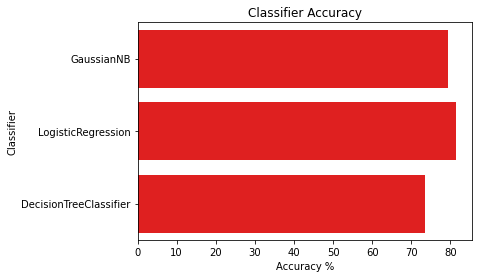

In [53]:
# Acurracy plot
sns.barplot(x='Accuracy', y='Classifier', data=log, color="r")
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

<h3 align="center">Interpretting the Models</h3> 

So our results show that the GaussianNB model gives ~80% accuracy, the Logisitc Regression model gives ~88% accuracy and the DSecision Tree model gives ~75% accuracy.

Since our Logistic Regression model performs the best, let's optimize it to see if we can get better accuracy.

In [54]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(emp_X_train,emp_y_train)
y_pred = log_reg.predict(emp_X_test)

In [55]:
accuracy_score(emp_y_test,y_pred)

0.8152173913043478

### Grid Search Optimization

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [58]:
log_opt = GridSearchCV(estimator=log_reg, param_grid = param_grid,n_jobs=-1, scoring='accuracy',error_score=0)

In [59]:
log_opt.fit(emp_X_train,emp_y_train)

C:\Users\Advaith\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Advaith\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Advaith\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Advaith\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


GridSearchCV(error_score=0,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [60]:
log_opt.cv_results_

{'mean_fit_time': array([0.88084831, 0.80191255, 0.03045449, 0.8601645 , 0.76125255,
        0.02265868, 0.81534529, 0.77718396, 0.0240067 , 0.639432  ,
        0.77220516, 0.02725205, 0.57598872, 0.44856868, 0.01919789]),
 'std_fit_time': array([0.08498519, 0.02955303, 0.00746466, 0.14625216, 0.0696639 ,
        0.00336401, 0.06467174, 0.03111169, 0.00507347, 0.04986674,
        0.15418244, 0.00816948, 0.06825452, 0.09466582, 0.00392635]),
 'mean_score_time': array([0.00805731, 0.0063911 , 0.00327268, 0.00319972, 0.00311546,
        0.00320001, 0.00672297, 0.00203009, 0.00671468, 0.00491028,
        0.005618  , 0.00641642, 0.00321016, 0.00479584, 0.00159678]),
 'std_score_time': array([6.55222493e-05, 3.19559468e-03, 3.05069516e-03, 3.91884332e-03,
        3.81820715e-03, 3.91919327e-03, 4.35749848e-03, 2.52075457e-03,
        3.41265616e-03, 4.01388047e-03, 3.20316951e-03, 3.20826743e-03,
        3.93165858e-03, 3.91581624e-03, 3.19356918e-03]),
 'param_C': masked_array(data=[100, 10

In [61]:
pd.DataFrame(log_opt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.880848,0.084985,0.008057,0.000066,100,l2,newton-cg,"{'C': 100, 'penalty': 'l2', 'solver': 'newton-...",0.864253,0.837104,0.845455,0.863636,0.854545,0.852999,0.010505,2
1,0.801913,0.029553,0.006391,0.003196,100,l2,lbfgs,"{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846154,0.846154,0.845455,0.854545,0.850000,0.848462,0.003437,7
2,0.030454,0.007465,0.003273,0.003051,100,l2,liblinear,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",0.855204,0.846154,0.854545,0.854545,0.845455,0.851181,0.004402,5
3,0.860164,0.146252,0.003200,0.003919,10,l2,newton-cg,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.864253,0.837104,0.845455,0.863636,0.854545,0.852999,0.010505,2
4,0.761253,0.069664,0.003115,0.003818,10,l2,lbfgs,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.846154,0.846154,0.845455,0.850000,0.845455,0.846643,0.001707,10
5,0.022659,0.003364,0.003200,0.003919,10,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.855204,0.841629,0.854545,0.850000,0.845455,0.849367,0.005224,6
6,0.815345,0.064672,0.006723,0.004357,1.0,l2,newton-cg,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...",0.864253,0.837104,0.845455,0.863636,0.854545,0.852999,0.010505,2
7,0.777184,0.031112,0.002030,0.002521,1.0,l2,lbfgs,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.841629,0.846154,0.845455,0.850000,0.845455,0.845738,0.002660,12
8,0.024007,0.005073,0.006715,0.003413,1.0,l2,liblinear,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.850679,0.846154,0.840909,0.854545,0.845455,0.847548,0.004673,9
9,0.639432,0.049867,0.004910,0.004014,0.1,l2,newton-cg,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...",0.864253,0.837104,0.854545,0.868182,0.859091,0.856635,0.010800,1


In [62]:
y_pred1 = log_opt.predict(emp_X_test)

In [63]:
log_opt.score(emp_X_test,emp_y_test)

0.8260869565217391

Still ~84% accuracy

### Best performing model parameter

In [64]:
log_opt.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [65]:
log_best = LogisticRegression(penalty = 'l2', C = 1, solver='newton-cg', max_iter=1000)

In [66]:
log_best.fit(emp_X_train,emp_y_train)

C:\Users\Advaith\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Advaith\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Advaith\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Advaith\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Advaith\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn(

LogisticRegression(C=1, max_iter=1000, solver='newton-cg')

In [67]:
y_pred = log_best.predict(emp_X_test)

In [68]:
log_best.score(emp_X_test,emp_y_test)

0.8233695652173914

**So the Logistic Regression model is still 84% accurate after optimizing and using the best parameters but it performed better before optimizing/changing the parameters.**

In [69]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(emp_X_train,emp_y_train)
y_pred = log_reg.predict(emp_X_test)
print("Original Model Accuracy Score:",accuracy_score(emp_y_test,y_pred))

Original Model Accuracy Score: 0.8152173913043478


So let's further evaluate the original model to interpret it.

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
con_matrix = confusion_matrix(emp_y_test, y_pred)
print(con_matrix)

[[300   1]
 [ 67   0]]


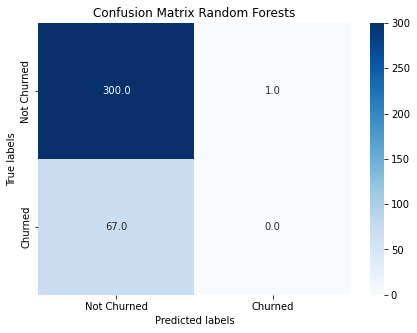

In [72]:
#plotting a confusion matrix
labels = ['Not Churned', 'Churned']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(con_matrix,cmap="Blues",annot=True,fmt='.1f', ax = ax); 

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Random Forests'); 

The dimension of this matrix is 2*2 because this model is binary classification. The classes of the Attrition variable are 0 and 1.

88% (325/368) of the IBM employees were correctly classified as churned and not churned.

In [73]:
from sklearn.metrics import classification_report

In [74]:
target_names = ['Not Churned', 'Churned']
print(classification_report(emp_y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.82      1.00      0.90       301
     Churned       0.00      0.00      0.00        67

    accuracy                           0.82       368
   macro avg       0.41      0.50      0.45       368
weighted avg       0.67      0.82      0.73       368



<h3 align="center">Final Analysis</h3> 

From this analysis, we can draw two things. The Logistic Regression classifier is the best compared to the Decision Tree and Gaussian NB. To improve accuracy we could try different models or use more training data.

The correlation analysis told us that the key driver of employee churn is lack of promotions. IBM can improve retention among their employees by implementing more opportunities for promotion.